In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json

In [2]:
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

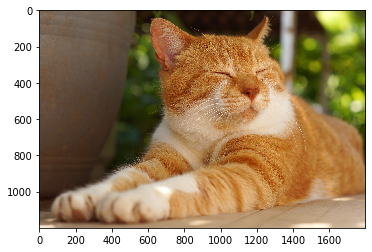

In [4]:
image = Image.open(r'N:\deep learning\cat.jpg')
plt.imshow(image)

In [5]:
vgg = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\sai ram/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100.0%


In [6]:
vgg.classifier[-1]    #vgg.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [7]:
CUDA = torch.cuda.is_available()
if CUDA:
    vgg = vgg.cuda()

In [11]:
#Apply the transforms on the image
image = transform(image)

In [12]:
print(image.shape)

torch.Size([3, 224, 224])


In [13]:
#Add the batch size
image = image.unsqueeze(0)

In [14]:
image.shape

torch.Size([1, 3, 224, 224])

In [15]:
#Wrap it up in a variable
image = Variable(image)

In [16]:
#Transfer it to the GPU
if CUDA:
    image = image.cuda()

In [17]:
print(image)

tensor([[[[-0.0116, -0.0458, -0.0458,  ..., -0.9363, -0.9877, -1.0562],
          [ 0.0569,  0.0227,  0.0398,  ..., -0.9705, -1.0219, -1.0562],
          [ 0.0227, -0.0287,  0.0056,  ..., -1.0048, -1.0048, -1.0390],
          ...,
          [ 1.5639,  1.5982,  1.6495,  ...,  1.9920,  2.0434,  2.0263],
          [ 2.0092,  2.0092,  2.0263,  ...,  1.8893,  1.9235,  1.9064],
          [ 2.1290,  2.1290,  2.1462,  ...,  1.7009,  1.7352,  1.7180]],

         [[-0.3025, -0.3200, -0.3200,  ..., -0.7402, -0.7927, -0.8627],
          [-0.2850, -0.2675, -0.2325,  ..., -0.7752, -0.8277, -0.8978],
          [-0.2150, -0.2325, -0.2675,  ..., -0.7927, -0.8627, -0.9153],
          ...,
          [ 1.2556,  1.3081,  1.3431,  ...,  1.8683,  1.8859,  1.8683],
          [ 1.9034,  1.9034,  1.9209,  ...,  1.7108,  1.6933,  1.6933],
          [ 2.1134,  2.1134,  2.1134,  ...,  1.4832,  1.4832,  1.4657]],

         [[-0.4101, -0.4450, -0.4101,  ..., -1.1944, -1.2293, -1.3339],
          [-0.4275, -0.3927, -

In [18]:

output = vgg(image)

In [19]:
print(output.shape)

torch.Size([1, 1000])


In [20]:
#Transfer the 2D Tensor to 1D
output = output.squeeze(0)

In [22]:
output.shape

torch.Size([1000])

In [24]:
labels = json.load(open(r'N:\deep learning\imagenet_class_index.json'))

In [25]:

index = output.max(0)

In [26]:
index

torch.return_types.max(values=tensor(15.7961, grad_fn=<MaxBackward0>), indices=tensor(282))

In [32]:
index = str(index[1].item())
label = labels[index][1]

In [33]:
labels

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [34]:
label

'tiger_cat'

In [35]:
module_list = list(vgg.features.modules())

In [36]:
module_list

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (1): ReLU(inplace=True)
   (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (3): ReLU(inplace=True)
   (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (6): ReLU(inplace=True)
   (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (8): ReLU(inplace=True)
   (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace=True)
   (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (13): ReLU(inplace=True)
   (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (15): ReLU(inplace=True)
   (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (17): Conv2d(

In [37]:
print(vgg.features)
print(module_list[0])
print(module_list[1])
print(module_list[2])

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [38]:

outputs = []
names = []
for layer in module_list[1:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))

In [43]:
outputs

[tensor([[[[0.9130, 0.3373, 0.3716,  ..., 0.1258, 0.1370, 0.0871],
           [1.1536, 0.4717, 0.5975,  ..., 0.2980, 0.2654, 0.0972],
           [1.0855, 0.5057, 0.6362,  ..., 0.3434, 0.2564, 0.0310],
           ...,
           [1.3356, 0.7396, 0.7799,  ..., 0.5962, 0.6734, 0.0000],
           [1.1019, 0.6466, 0.6870,  ..., 0.6365, 0.6786, 0.0000],
           [1.1007, 0.6941, 0.7174,  ..., 0.8221, 0.8532, 0.2069]],
 
          [[0.0000, 0.0434, 0.1079,  ..., 0.0000, 0.0000, 1.7894],
           [0.0000, 0.4610, 0.3740,  ..., 0.0000, 0.0000, 2.7000],
           [0.1058, 0.3636, 0.4528,  ..., 0.0612, 0.0865, 2.7911],
           ...,
           [5.2697, 2.2750, 2.1993,  ..., 0.1945, 0.0000, 0.0000],
           [5.7160, 1.3475, 1.3204,  ..., 0.0000, 0.0000, 0.0000],
           [0.8186, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.8648, 1.0289, 1.0089,  ..., 2.2220, 2.3078, 4.0044],
           [0.5853, 0.3806, 0.3511,  ..., 0.5284, 0.5295, 1.5643],
           [0.4713, 0.39

In [39]:
for feature_map in outputs:
    print(feature_map.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [40]:

processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    #Convert the 3D Tensor to 2D. Sum the same element of every channel
    gray_scale = torch.sum(feature_map, 0)
    gray_scale = gray_scale/feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())

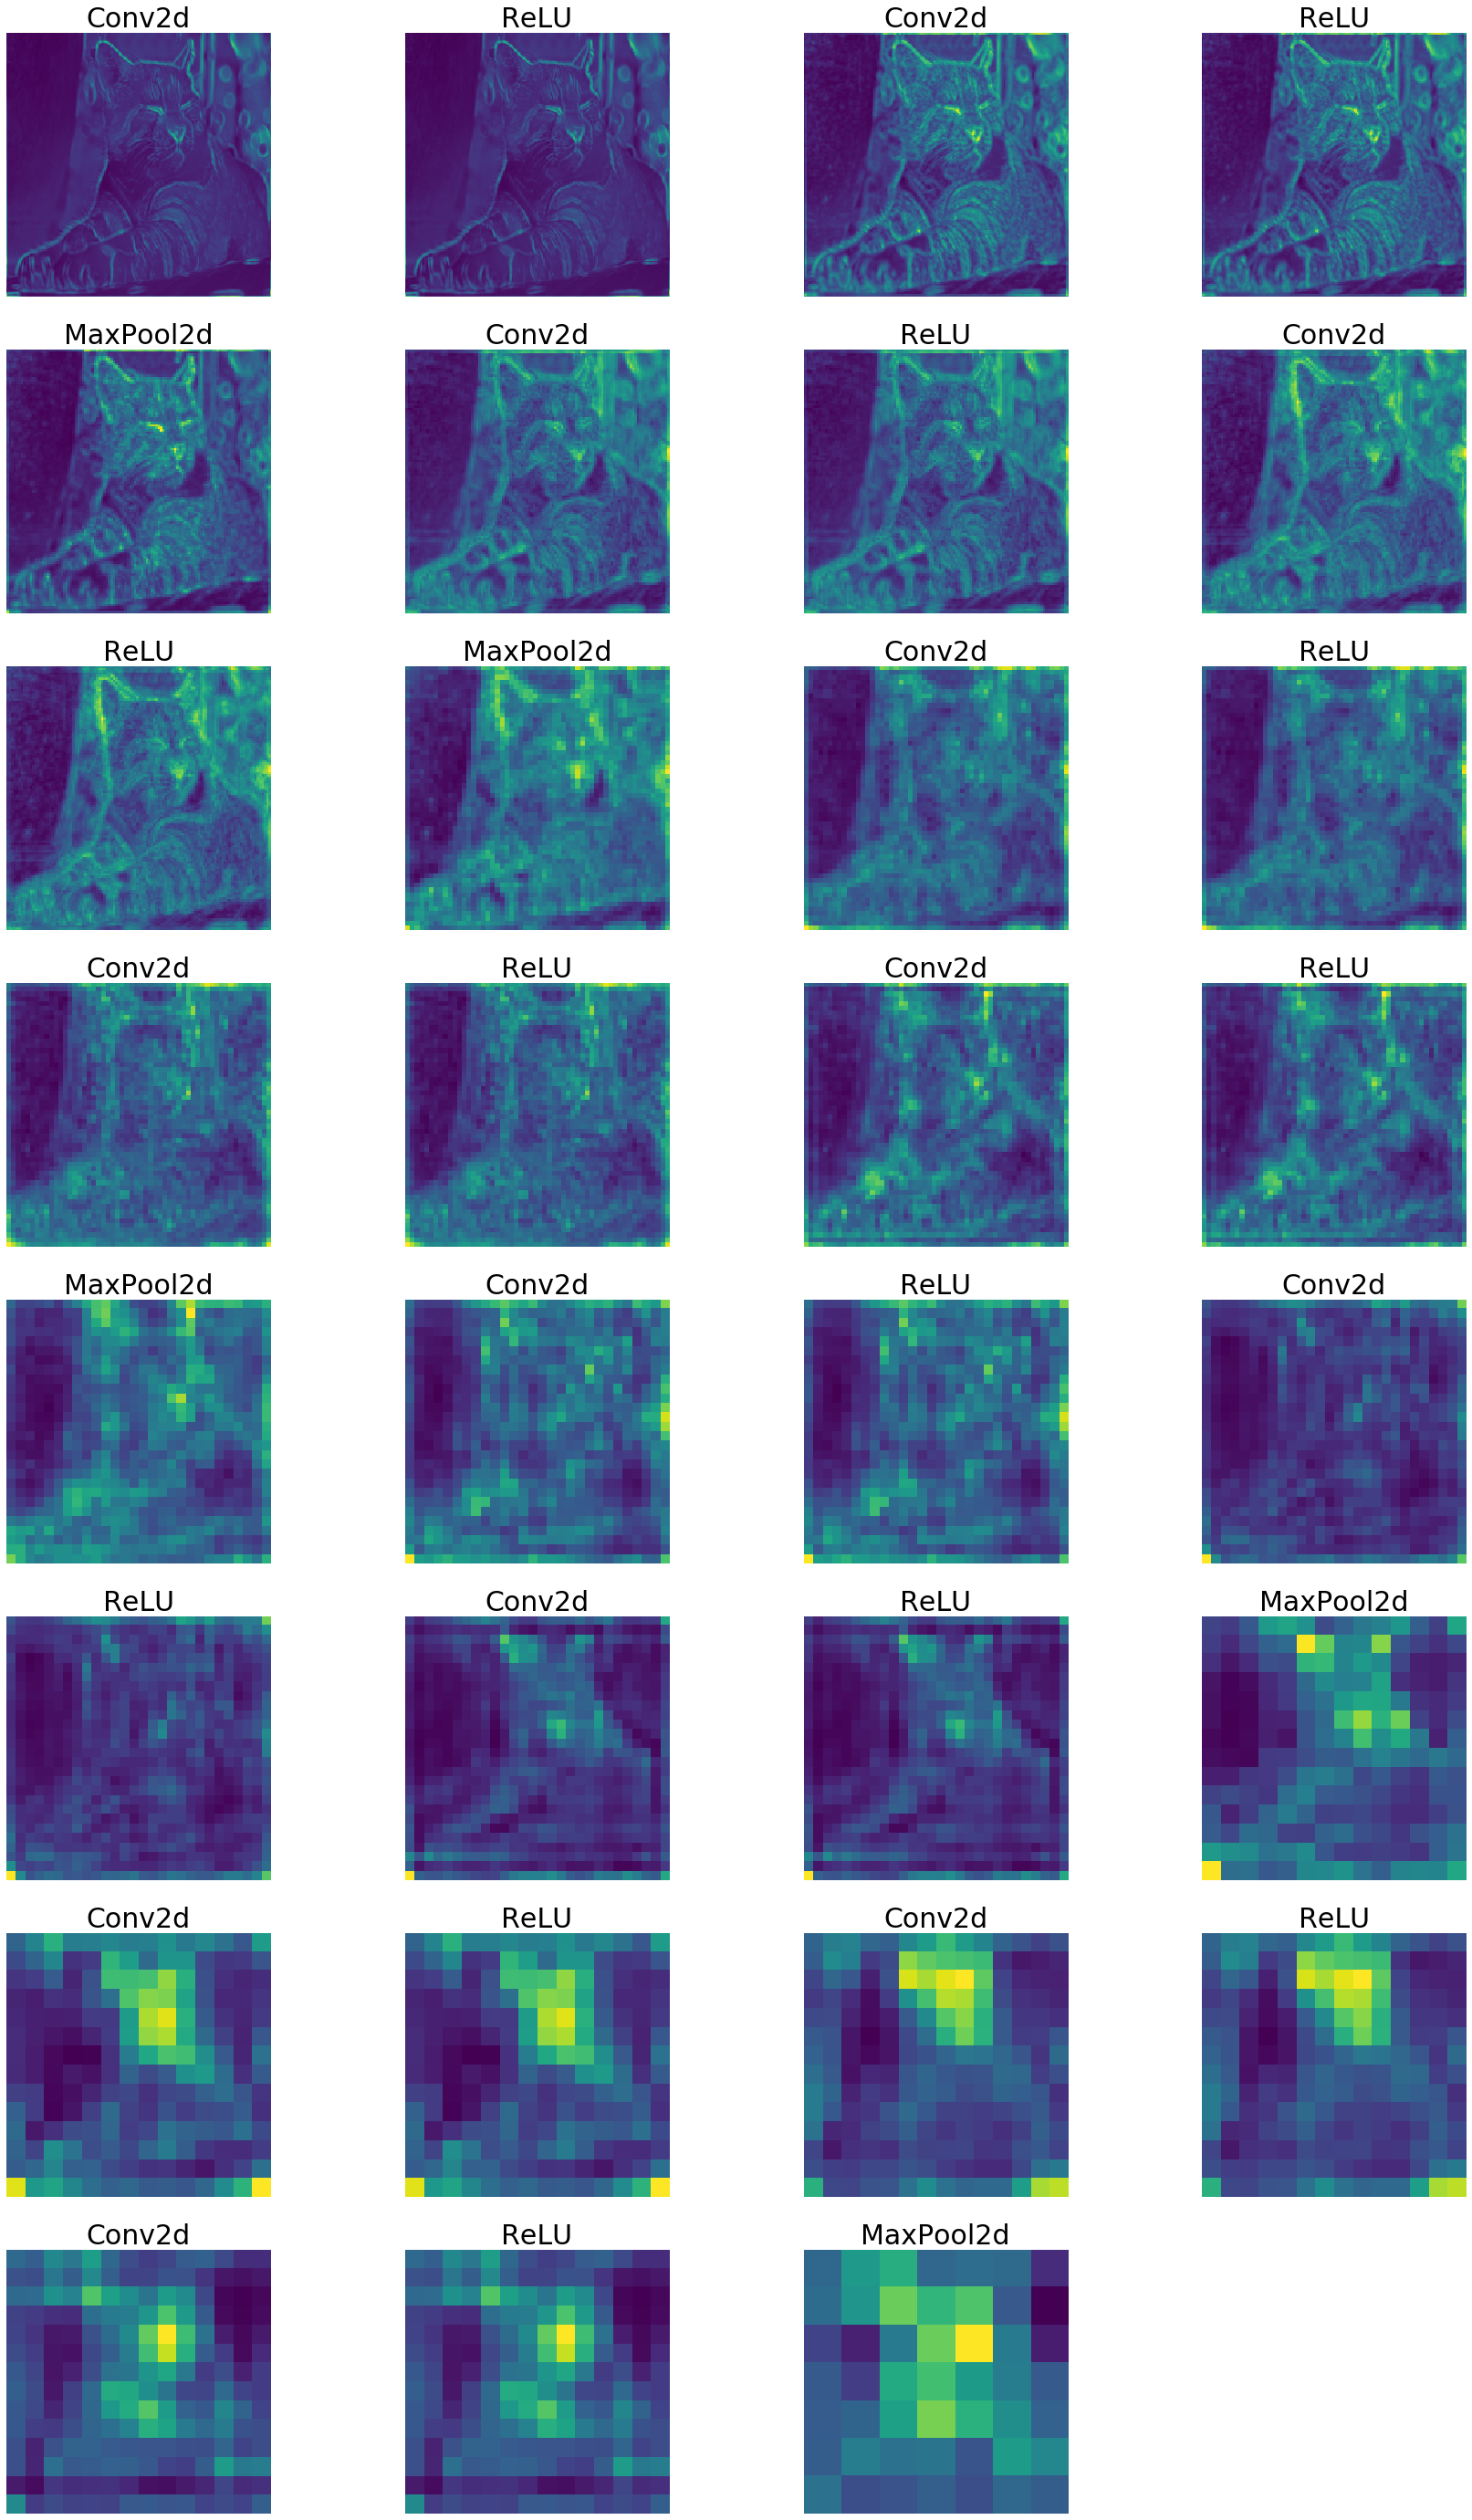

In [41]:
fig = plt.figure(figsize = (30,50))

for i in range(len(processed)):
    a = fig.add_subplot(8,4,i+1)
    imgplot = plt.imshow(processed[i])
    plt.axis('off')
    a.set_title(names[i].split('(')[0], fontsize=30)

plt.savefig('feature_maps.jpg', bbox_inches='tight')

In [42]:
names

['Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)',
 'Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)',
 'Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)',
 'Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(